<a href="https://colab.research.google.com/github/s-neela/neela_INFO5731_spring2021/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [ ]:
pip install pyLDAvis

     |████████████████████████████████| 1.7MB 6.5MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.2.2-py2.py3-none-any.whl size=135593 sha256=a9692513ed5e019aee7f042e0ac2a3af005e4349898925a54db6d6a0595374bc
  Stored in directory: /root/.cache/pip/wheels/74/df/b6/97234c8446a43be05c9a8687ee0db1f1b5ade5f27729187eae
Successfully built pyLDAvis


In [ ]:
pip install spacy==0.101.0

     |████████████████████████████████| 2.3MB 5.3MB/s 
     |████████████████████████████████| 92kB 6.6MB/s 
     |████████████████████████████████| 696kB 43.9MB/s 
  ERROR: Failed building wheel for spacy
  Running setup.py clean for spacy
  Created wheel for murmurhash: filename=murmurhash-0.26.4-cp37-cp37m-linux_x86_64.whl size=42252 sha256=31fcf823e65f27431d5b73a0f293a8da41041caa1e827a65b19e22db58cb14d1
  Stored in directory: /root/.cache/pip/wheels/90/af/51/9efd49862c6dcb6439baaa235714fc4de5cecf3e01613b2fef
  Created wheel for cymem: filename=cymem-1.31.2-cp37-cp37m-linux_x86_64.whl size=76988 sha256=d36d475973f9988a38461a895d49d24db832e19110b4bbe2a7bb2ab296738424
  Stored in directory: /root/.cache/pip/wheels/55/8d/4a/f6328252aa2aaec0b1cb906fd96a1566d77f0f67701071ad13
  ERROR: Failed building wheel for preshed
  Running setup.py clean for preshed
  ERROR: Failed building wheel for thinc
  Running setup.py clean for thinc
Successfully built murmurhash cymem
Failed to build spacy p

In [ ]:
pip install spacy

  Found existing installation: cymem 1.31.2
    Uninstalling cymem-1.31.2:
      Successfully uninstalled cymem-1.31.2
  Found existing installation: murmurhash 0.26.4
    Uninstalling murmurhash-0.26.4:
      Successfully uninstalled murmurhash-0.26.4


In [ ]:
# Write your code here
import nltk; nltk.download('stopwords')

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
f = open("Inclass6.csv").read()
df=f.split()
df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[',0',
 '0,"',
 'Privacy',
 'Preserving',
 'Data',
 'Mining',
 '"',
 '1,"',
 'Privacy-Preserving',
 'Data',
 'Mining',
 '"',
 '2,"',
 'Data',
 'Mining:',
 'Concepts',
 'and',
 'Techniques',
 '"',
 '3,"',
 'The',
 'WEKA',
 'Data',
 'Mining',
 'Software:',
 'An',
 'Update',
 '"',
 '4,"',
 'Efficient',
 'and',
 'Effective',
 'Clustering',
 'Methods',
 'for',
 'Spatial',
 'Data',
 'Mining',
 '"',
 '5,"',
 'Data',
 'Mining:',
 'An',
 'Overview',
 'from',
 'Database',
 'Perspective',
 '"',
 '6,"',
 'From',
 'Data',
 'Mining',
 'to',
 'Knowledge',
 'Discovery',
 'in',
 'Databases.',
 '"',
 '7,"',
 'Data',
 'Mining',
 'Approaches',
 'for',
 'Intrusion',
 'Detection,',
 '"',
 '8,"',
 'Survey',
 'of',
 'clustering',
 'data',
 'mining',
 'techniques',
 '"',
 '9,"',
 'The',
 'Elements',
 'of',
 'Statistical',
 'Learning',
 '--',
 'Data',
 'Mining,',
 'Inference,',
 'and',
 'Prediction',
 '"',
 '10,"',
 'Untangling',
 'text',
 'data',
 'mining',
 '"',
 '11,"',
 'Fastmap:',
 'A',
 'fast',
 'algorith

In [ ]:
df = [re.sub('\S*@\S*\s?', '', i) for i in df]

# Remove new line characters
df = [re.sub('\s+', ' ', i) for i in df]

# Remove distracting single quotes
df = [re.sub("\'", "", i) for i in df]

pprint(df[:100])

[',0',
 '0,"',
 'Privacy',
 'Preserving',
 'Data',
 'Mining',
 '"',
 '1,"',
 'Privacy-Preserving',
 'Data',
 'Mining',
 '"',
 '2,"',
 'Data',
 'Mining:',
 'Concepts',
 'and',
 'Techniques',
 '"',
 '3,"',
 'The',
 'WEKA',
 'Data',
 'Mining',
 'Software:',
 'An',
 'Update',
 '"',
 '4,"',
 'Efficient',
 'and',
 'Effective',
 'Clustering',
 'Methods',
 'for',
 'Spatial',
 'Data',
 'Mining',
 '"',
 '5,"',
 'Data',
 'Mining:',
 'An',
 'Overview',
 'from',
 'Database',
 'Perspective',
 '"',
 '6,"',
 'From',
 'Data',
 'Mining',
 'to',
 'Knowledge',
 'Discovery',
 'in',
 'Databases.',
 '"',
 '7,"',
 'Data',
 'Mining',
 'Approaches',
 'for',
 'Intrusion',
 'Detection,',
 '"',
 '8,"',
 'Survey',
 'of',
 'clustering',
 'data',
 'mining',
 'techniques',
 '"',
 '9,"',
 'The',
 'Elements',
 'of',
 'Statistical',
 'Learning',
 '--',
 'Data',
 'Mining,',
 'Inference,',
 'and',
 'Prediction',
 '"',
 '10,"',
 'Untangling',
 'text',
 'data',
 'mining',
 '"',
 '11,"',
 'Fastmap:',
 'A',
 'fast',
 'algorith

In [ ]:
def sent_to_words(lines):
    for line in lines:
        yield(gensim.utils.simple_preprocess(str(line), deacc=True))  # deacc=True removes punctuations

data = list(sent_to_words(df))

print(data[:100])

[[], [], ['privacy'], ['preserving'], ['data'], ['mining'], [], [], ['privacy', 'preserving'], ['data'], ['mining'], [], [], ['data'], ['mining'], ['concepts'], ['and'], ['techniques'], [], [], ['the'], ['weka'], ['data'], ['mining'], ['software'], ['an'], ['update'], [], [], ['efficient'], ['and'], ['effective'], ['clustering'], ['methods'], ['for'], ['spatial'], ['data'], ['mining'], [], [], ['data'], ['mining'], ['an'], ['overview'], ['from'], ['database'], ['perspective'], [], [], ['from'], ['data'], ['mining'], ['to'], ['knowledge'], ['discovery'], ['in'], ['databases'], [], [], ['data'], ['mining'], ['approaches'], ['for'], ['intrusion'], ['detection'], [], [], ['survey'], ['of'], ['clustering'], ['data'], ['mining'], ['techniques'], [], [], ['the'], ['elements'], ['of'], ['statistical'], ['learning'], [], ['data'], ['mining'], ['inference'], ['and'], ['prediction'], [], [], ['untangling'], ['text'], ['data'], ['mining'], [], [], ['fastmap'], [], ['fast'], ['algorithm'], ['for'],

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data[1]]])

[]


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
def remove_stopwords(t):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in t]
def make_bigrams(t):
    return [bigram_mod[doc] for doc in t]
def make_trigrams(t):
    return [trigram_mod[bigram_mod[doc]] for doc in t]
def lemmat(t, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts = []
    for sent in t:
        doc = nlp(" ".join(sent)) 
        texts.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts
data_nostops = remove_stopwords(data)

# Form Bigrams
data_bigrams = make_bigrams(data_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
#nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
#data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_bigrams[:1])

[[]]


In [ ]:
# Create Dictionary
dict1 = corpora.Dictionary(data_bigrams)

# Create Corpus
texts = data_bigrams

# Term Document Frequency
corpus = [dict1.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[]]


In [ ]:
dict1[0]

'privacy'

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [ ]:
# Write your code here

import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    list1 = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for i in fin.readlines():
            text = i.strip()
            list1.append(text)
    print("Total Number of Documents:",len(list1))
    titles.append( text[0:min(len(text),100)] )
    return list1,titles
    
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts



In [ ]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [ ]:
def create_gensim_lsa_model(doc_clean,no_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=no_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=no_topics, num_words=words))
    return lsamodel

In [ ]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [ ]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

In [ ]:
number_of_topics=7
words=10
f = open("Inclass6.csv").read()
#document_list,titles=load_data("","Inclass6.csv")
clean_text=preprocess_data(f)
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

[(0, '1.000*"n" + 0.000*"e" + -0.000*"g" + -0.000*"p" + -0.000*"l" + -0.000*"w" + 0.000*"c" + 0.000*"1" + -0.000*"8" + -0.000*"f"'), (1, '1.000*"e" + -0.000*"n" + -0.000*"p" + 0.000*"g" + -0.000*"w" + 0.000*"r" + 0.000*"l" + 0.000*"4" + -0.000*"6" + 0.000*"1"'), (2, '-1.000*"r" + -0.000*"g" + 0.000*"l" + 0.000*"f" + -0.000*"c" + 0.000*"8" + 0.000*"e" + 0.000*"0" + -0.000*"k" + 0.000*"4"'), (3, '1.000*"g" + -0.000*"r" + 0.000*"l" + -0.000*"c" + 0.000*"f" + 0.000*"n" + -0.000*"p" + -0.000*"e" + 0.000*"8" + 0.000*"4"'), (4, '1.000*"l" + -0.000*"c" + 0.000*"r" + -0.000*"g" + -0.000*"u" + -0.000*"f" + -0.000*"e" + 0.000*"h" + 0.000*"6" + 0.000*"p"'), (5, '-1.000*"c" + -0.000*"l" + 0.000*"p" + -0.000*"u" + -0.000*"g" + 0.000*"r" + 0.000*"h" + 0.000*"f" + -0.000*"v" + 0.000*"1"'), (6, '-1.000*"f" + -0.000*"p" + 0.000*"u" + -0.000*"l" + 0.000*"x" + 0.000*"g" + -0.000*"c" + -0.000*"w" + -0.000*"r" + 0.000*"6"')]


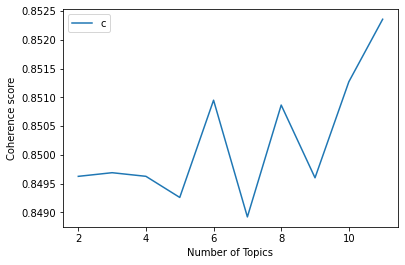

In [ ]:
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)

we are able clearly see that LDA strategy gave a most noteworthy coherece score of 0.811 , I can say Latent Dirichlet Allocation(LDA) strategy is the ideal esteem additionally the number of themes are good.